# Measure of "bestness" -- Blood Lead Levels

In [29]:
import pandas as pd
import geopandas as gpd
import numpy as np

%matplotlib inline

## Importing data

In [30]:
education = pd.read_csv('education-income.csv',
                           index_col="Neighborhood",
                           parse_dates=True)
s = pd.DataFrame(education)

s.head()

,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
Neighborhood,,,,,,,,,,,,,,,
Allegheny Center,3,933,609,18.7%,44.5%,17.2%,15.8%,3.8%,"$16,964","$20,911","$22,535","$22,793",954,324,34.0%
Allegheny West,3,462,239,9.2%,28.9%,6.7%,44.8%,10.5%,"$26,638","$41,761","$35,386","$45,519",239,12,5.0%
Allentown,6,"2,500","1,729",23.0%,63.3%,6.6%,5.6%,1.5%,"$22,539","$29,274","$29,941","$31,909","2,212",630,28.5%
Arlington,7,"1,869","1,232",14.9%,65.3%,10.1%,7.1%,2.5%,"$27,167","$25,119","$36,089","$27,380","1,779",361,20.3%
Arlington Heights,7,244,166,18.1%,74.1%,0.0%,7.8%,0.0%,"$18,646","$9,417","$24,769","$10,265",293,169,57.7%


We'll drop out the previous years and only look at the most recent data.

In [31]:
del s['Sector #']
del s['Population (2010)']
del s['Total Pop, 25 and older (2010)']
del s['Edu. Attainment: Less than High School (2010)']
del s['Edu. Attainment: Assoc./Prof. Degree (2010)']
del s['Edu. Attainment: Bachelor\'s Degree (2010)']
del s['Edu. Attainment: Postgraduate Degree (2010)']
del s['1999 Median Income (\'99 Dollars)']
del s['2009 Median Income (\'09 Dollars)']
del s['1999 Median Income (\'11 Dollars)']
del s['2009 Med. Income (\'13 Dollars)']
del s['Est. Pop. for which Poverty Calc. (2010)']
del s['Est. Percent Under Poverty (2010)']
del s['Edu. Attainment: High School Graduate (2010)']

Next, we'll rename the column to something a little more consice and readable, and then we'll reprint the data with only that one column to simplify it a bit.

In [32]:
# renaming column to make it prettier
s = s.rename(columns={'Est. Pop. Under Poverty (2010)':'People Under Poverty Line'})

# reprinting with only our most recent column still in the dataframe
s.head()

,People Under Poverty Line
Neighborhood,
Allegheny Center,324
Allegheny West,12
Allentown,630
Arlington,361
Arlington Heights,169


## Sorting Data

The focus of the project is to measure neighborhood 'bestness', so what I'm doing here is sorting the data by who has the **least** number of people in their neighborhood under the poverty line. We're also going to filter out results higher than 0.7% so that the neighborhoods play nicely with the bar graph.

In [38]:
# sorting the data in ascending order to show the highest levels of blood lead

# removing the commas from the column and parsing the va
s['People Under Poverty Line'] = s['People Under Poverty Line'].replace({',':''}, regex=True)
s[["People Under Poverty Line"]] = s[["People Under Poverty Line"]].apply(pd.to_numeric)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [40]:
poverty_levels = s[s['People Under Poverty Line']<100].sort_values('People Under Poverty Line',ascending=True)
poverty_levels_table = s.sort_values('People Under Poverty Line',ascending=True)

poverty_levels.head(30)

,People Under Poverty Line
Neighborhood,
North Shore,0
South Shore,0
West End,0
Strip District,10
Allegheny West,12
Regent Square,12
Chartiers City,22
Swisshelm Park,30
East Carnegie,32


## Representation

We're going to set up the previously mentioned bar graph and display our data, which will show the neighborhoods with the best results (remember, lower is better).

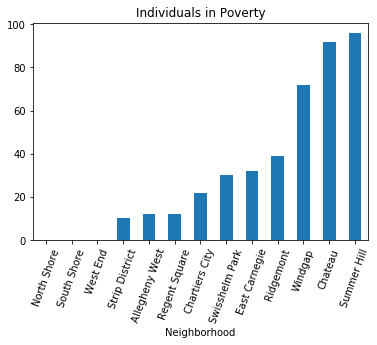

In [42]:
# setting up bar graph
poverty_levels.loc[:,'People Under Poverty Line'].plot(kind="bar", title = "Individuals in Poverty", rot=70)